# How likely is rape to be reported based on the number of persons arrested for rape?

In [1]:
# Basic Libraries
import numpy as np
import os
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
# Reading Files

arrests_under_crime_against_women = pd.read_csv('43_Arrests_under_crime_against_women.csv', on_bad_lines='skip')

crimes_against_women = pd.read_csv('42_District_wise_crimes_committed_against_women_2001_2012.csv')

# Data Cleaning

In [4]:
# <<arrests under crime against women (Persons_Arrested, Sub_Group_Name: Rape)>>

arrests_under_crime_against_women.info()
arrests_under_crime_against_women.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2765 entries, 0 to 2764
Data columns (total 16 columns):
 #   Column                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                   --------------  ----- 
 0   Area_Name                                                                                                2765 non-null   object
 1   Year                                                                                                     2765 non-null   int64 
 2   Group_Name                                                                                               2765 non-null   object
 3   Sub_Group_Name                                                                                           2765 non-null   object
 4   Persons_Acquitted                                                                         

,Area_Name,Year,Group_Name,Sub_Group_Name,Persons_Acquitted,Persons_against_whom_cases_Compounded_or_Withdrawn,Persons_Arrested,Persons_Chargesheeted,Persons_Convicted,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_beginning,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_end,Persons_in_Custody_or_on_Bail_during_Trial_at_Year_End,Persons_Released_or_Freed_by_Police_or_Magistrate_before_Trial_for_want_of_evidence_or_any_other_reason,Persons_Trial_Completed,Persons_under_Trial_at_Year_beginning,Total_Persons_under_Trial
0,Andaman & Nicobar Islands,2001,Rape,01. Rape,6,0,3,3,0,6,6,45,0,6,48,51
1,Andhra Pradesh,2001,Rape,01. Rape,1168,13,1150,1021,246,450,545,2191,34,1414,2597,3618
2,Arunachal Pradesh,2001,Rape,01. Rape,1,0,51,31,2,25,30,347,15,3,319,350
3,Assam,2001,Rape,01. Rape,403,14,928,585,120,806,959,2331,190,523,2283,2868
4,Bihar,2001,Rape,01. Rape,756,0,1400,1302,217,719,576,5963,241,973,5634,6936


In [13]:
# Extract Sub_Group_Name: Rape (based on .csv file indexing) 10 Years (2001-2010) x 35 Indian States = 350

rape_arrests_under_crime_against_women = arrests_under_crime_against_women.iloc[:350]

In [14]:
rape_arrests_under_crime_against_women.info()
rape_arrests_under_crime_against_women.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 16 columns):
 #   Column                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                   --------------  ----- 
 0   Area_Name                                                                                                350 non-null    object
 1   Year                                                                                                     350 non-null    int64 
 2   Group_Name                                                                                               350 non-null    object
 3   Sub_Group_Name                                                                                           350 non-null    object
 4   Persons_Acquitted                                                                           

,Area_Name,Year,Group_Name,Sub_Group_Name,Persons_Acquitted,Persons_against_whom_cases_Compounded_or_Withdrawn,Persons_Arrested,Persons_Chargesheeted,Persons_Convicted,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_beginning,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_end,Persons_in_Custody_or_on_Bail_during_Trial_at_Year_End,Persons_Released_or_Freed_by_Police_or_Magistrate_before_Trial_for_want_of_evidence_or_any_other_reason,Persons_Trial_Completed,Persons_under_Trial_at_Year_beginning,Total_Persons_under_Trial
0,Andaman & Nicobar Islands,2001,Rape,01. Rape,6,0,3,3,0,6,6,45,0,6,48,51
1,Andhra Pradesh,2001,Rape,01. Rape,1168,13,1150,1021,246,450,545,2191,34,1414,2597,3618
2,Arunachal Pradesh,2001,Rape,01. Rape,1,0,51,31,2,25,30,347,15,3,319,350
3,Assam,2001,Rape,01. Rape,403,14,928,585,120,806,959,2331,190,523,2283,2868
4,Bihar,2001,Rape,01. Rape,756,0,1400,1302,217,719,576,5963,241,973,5634,6936


In [15]:
rape_arrests_under_crime_against_women.tail()

,Area_Name,Year,Group_Name,Sub_Group_Name,Persons_Acquitted,Persons_against_whom_cases_Compounded_or_Withdrawn,Persons_Arrested,Persons_Chargesheeted,Persons_Convicted,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_beginning,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_end,Persons_in_Custody_or_on_Bail_during_Trial_at_Year_End,Persons_Released_or_Freed_by_Police_or_Magistrate_before_Trial_for_want_of_evidence_or_any_other_reason,Persons_Trial_Completed,Persons_under_Trial_at_Year_beginning,Total_Persons_under_Trial
345,Tamil Nadu,2010,Rape,01. Rape,512,1,777,682,136,482,558,1930,19,648,1897,2579
346,Tripura,2010,Rape,01. Rape,180,1,320,226,32,97,148,228,43,212,215,441
347,Uttar Pradesh,2010,Rape,01. Rape,1218,0,2580,1842,1304,168,203,6343,703,2522,7023,8865
348,Uttarakhand,2010,Rape,01. Rape,118,0,171,159,86,4,16,370,0,204,415,574
349,West Bengal,2010,Rape,01. Rape,987,27,2395,2242,128,1095,1142,12436,106,1115,11336,13578


In [16]:
# extract Area_Name, Year, Persons_Arrested columns

persons_arrested_for_rape_RAW = rape_arrests_under_crime_against_women[['Area_Name', 'Year', 'Persons_Arrested']]
persons_arrested_for_rape_RAW.info()
persons_arrested_for_rape_RAW.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Area_Name         350 non-null    object
 1   Year              350 non-null    int64 
 2   Persons_Arrested  350 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.3+ KB


,Area_Name,Year,Persons_Arrested
0,Andaman & Nicobar Islands,2001,3
1,Andhra Pradesh,2001,1150
2,Arunachal Pradesh,2001,51
3,Assam,2001,928
4,Bihar,2001,1400


In [18]:
# sum all no. of persons arrested for rape from 2001-2010 for each state respectively
# total number of persons arrested for rape from 2001-2010 for each 35 states

persons_arrested_for_rape = persons_arrested_for_rape_RAW.groupby('Area_Name')['Persons_Arrested'].sum().reset_index()
persons_arrested_for_rape.info()
persons_arrested_for_rape.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Area_Name         35 non-null     object
 1   Persons_Arrested  35 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 692.0+ bytes


,Area_Name,Persons_Arrested
0,Andaman & Nicobar Islands,132
1,Andhra Pradesh,14160
2,Arunachal Pradesh,484
3,Assam,13259
4,Bihar,13145


In [19]:
# <<crimes_against_women>>

crimes_against_women.info()
crimes_against_women.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 10 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9017 non-null   object
 1   DISTRICT                                             9017 non-null   object
 2   Year                                                 9017 non-null   int64 
 3   Rape                                                 9017 non-null   int64 
 4   Kidnapping and Abduction                             9017 non-null   int64 
 5   Dowry Deaths                                         9017 non-null   int64 
 6   Assault on women with intent to outrage her modesty  9017 non-null   int64 
 7   Insult to modesty of Women                           9017 non-null   int64 
 8   Cruelty by Husband or his Relatives                  9017 non-null   int64 
 9

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [20]:
# Extract STATE/UT, Year, Rape Columns

CAW_raw = crimes_against_women[['STATE/UT', 'Year', 'Rape']]
CAW_raw.info()
CAW_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   STATE/UT  9017 non-null   object
 1   Year      9017 non-null   int64 
 2   Rape      9017 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 211.5+ KB


,STATE/UT,Year,Rape
0,ANDHRA PRADESH,2001,50
1,ANDHRA PRADESH,2001,23
2,ANDHRA PRADESH,2001,27
3,ANDHRA PRADESH,2001,20
4,ANDHRA PRADESH,2001,23


In [21]:
# renaming 'Rape' to 'Rape Reported' for clarity

CAW_raw.rename(columns={'Rape': 'Rape Reported'}, inplace=True)

/var/folders/xn/2f71kzwn1vq6sh8m47knsc0m0000gn/T/ipykernel_62153/3267260704.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CAW_raw.rename(columns={'Rape': 'Rape Reported'}, inplace=True)


In [22]:
# sum all Rape reported from 2001-2010 for each state (sum all districts of state) respectively
# total number of Rape reported from 2001-2010 for each 35 states

CAW = CAW_raw.groupby('STATE/UT')['Rape Reported'].sum().reset_index()
CAW.info()
CAW.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   STATE/UT       35 non-null     object
 1   Rape Reported  35 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 692.0+ bytes


,STATE/UT,Rape Reported
0,A & N ISLANDS,218
1,ANDHRA PRADESH,26958
2,ARUNACHAL PRADESH,1000
3,ASSAM,32356
4,BIHAR,26248


In [24]:
# <<combining persons_arrested_for_rape & CAW into one dataframe>>


persons_arrested_for_rape_CAW = pd.concat([persons_arrested_for_rape, CAW['Rape Reported']], axis=1)
persons_arrested_for_rape_CAW.info()
persons_arrested_for_rape_CAW.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Area_Name         35 non-null     object
 1   Persons_Arrested  35 non-null     int64 
 2   Rape Reported     35 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 972.0+ bytes


,Area_Name,Persons_Arrested,Rape Reported
0,Andaman & Nicobar Islands,132,218
1,Andhra Pradesh,14160,26958
2,Arunachal Pradesh,484,1000
3,Assam,13259,32356
4,Bihar,13145,26248


In [25]:
# drop Area_Name column which is now irrelevant as Persons_Arrested & Rape Reported are now corresponding in index

persons_arrested_for_rape_CAW.drop(columns=['Area_Name'], inplace=True)
persons_arrested_for_rape_CAW.info()
persons_arrested_for_rape_CAW.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Persons_Arrested  35 non-null     int64
 1   Rape Reported     35 non-null     int64
dtypes: int64(2)
memory usage: 692.0 bytes


,Persons_Arrested,Rape Reported
0,132,218
1,14160,26958
2,484,1000
3,13259,32356
4,13145,26248


# Exploratory Analysis

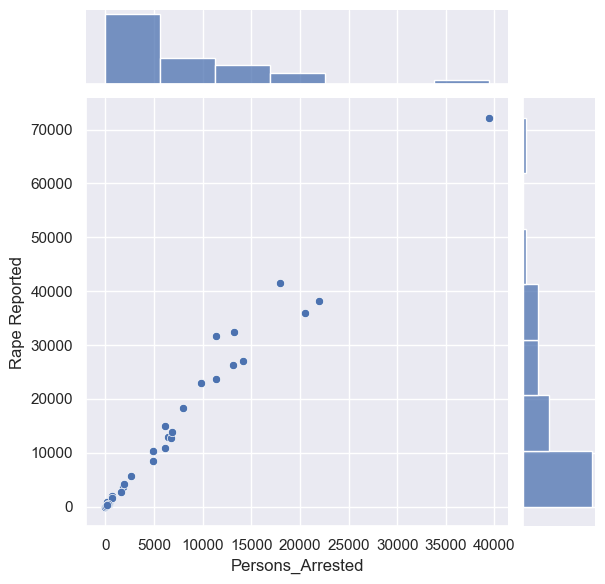

In [27]:
# Draw jointplot of Rape Reported against Persons_Arrested

sb.jointplot(data = persons_arrested_for_rape_CAW, x = "Persons_Arrested", y = "Rape Reported", height = 6)

                  Persons_Arrested  Rape Reported
Persons_Arrested          1.000000       0.985979
Rape Reported             0.985979       1.000000


<Axes: >

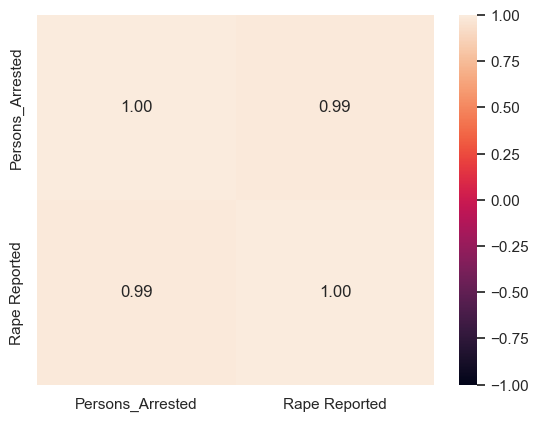

In [28]:
# calculate correlation between Rape Reported & Persons_Arrested

print(persons_arrested_for_rape_CAW.corr())
sb.heatmap(persons_arrested_for_rape_CAW.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

**Rape Reported & Persons_Arrested has a very strong positive correlation of 0.99, indicating a very strong linear relationship.**

# Machine Learning

**Predictor Machine Learning Models: Which is best for predicting Rape Reported using Persons_Arrested?**

**K-Nearest Neighbour (KNN) to predict Rape Reported using Persons_Arrested**

Reponse Variable, **Y**: Rape Reported

Predictor Variable, **X**: Persons_Arrested

In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(persons_arrested_for_rape_CAW['Persons_Arrested'], persons_arrested_for_rape_CAW['Rape Reported'], test_size=0.2, random_state=42)


X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)


# Create KNN model
#Grid Search with Cross-Validation to find optimal K
from sklearn.model_selection import GridSearchCV

# Define a range of K values to search
param_grid = {'n_neighbors': range(1, 21)}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best K value
best_k = grid_search.best_params_['n_neighbors']
k = best_k  
knn = KNeighborsRegressor(n_neighbors=k)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 179844160.2857143


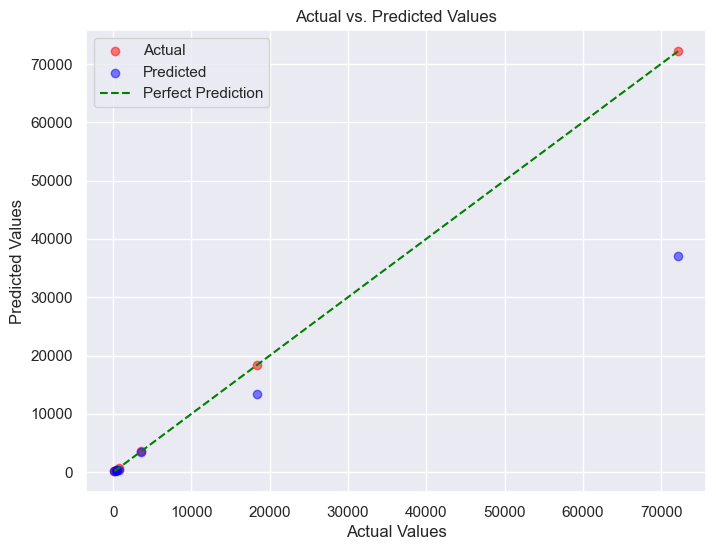

In [31]:
# Scatterplot of Predicted & Actual Rape Reported for KNN

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, color='red', label='Actual', alpha=0.5)  # Plot actual values in red
plt.scatter(y_test, y_pred, color='blue', label='Predicted', alpha=0.5)  # Plot predicted values in blue
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linestyle='--', label='Perfect Prediction')  # Add perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

**Ridge Regression to predict Rape Reported using Persons_Arrested**

In [32]:
from sklearn.linear_model import Ridge

# Initialize the Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization strength by changing the alpha parameter

# Fit the model on the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 7325195.47854473


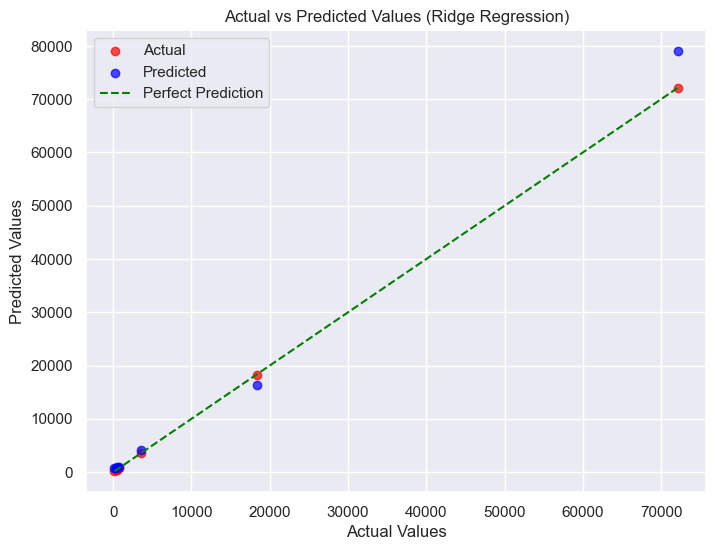

In [33]:
# Scatterplot of Predicted & Actual Rape Reported for Ridge Regression

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, color='red', label='Actual', alpha=0.7)  # Plot actual values in red
plt.scatter(y_test, y_pred, color='blue', label='Predicted', alpha=0.7)  # Plot predicted values in blue
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linestyle='--', label='Perfect Prediction')  # Add perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Ridge Regression)')
plt.legend()
plt.grid(True)
plt.show()

**Support Vector Machine (SVM) to predict Rape Reported using Complaints_Received/Alleged**

In [34]:
from sklearn.svm import SVR

# Initialize the SVR model
svm_model = SVR(kernel='linear', C=1.0)  # You can adjust the kernel and regularization parameter (C) as needed

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 6753632.837741917


/Users/ppt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


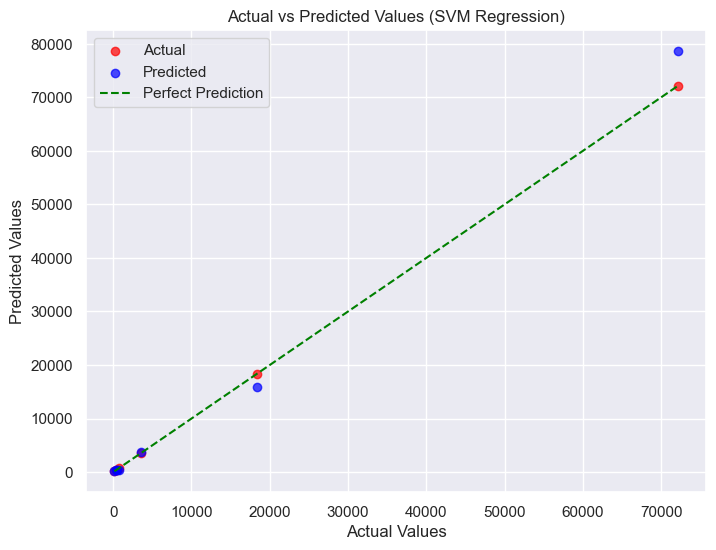

In [35]:
# Scatterplot of Predicted & Actual Rape Reported for SVM

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, color='red', label='Actual', alpha=0.7)  # Plot actual values in red
plt.scatter(y_test, y_pred, color='blue', label='Predicted', alpha=0.7)  # Plot predicted values in blue
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linestyle='--', label='Perfect Prediction')  # Add perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (SVM Regression)')
plt.legend()
plt.grid(True)
plt.show()

**As Rape Reported & Persons_Arrested has a very strong positive correlation of 0.99, indicating a very strong linear relationship, Persons_Arrested is a very important predictor of Rape Reported.**

**Out of the three machine learning models implemented (KNN: Mean Squared Error - 179844160.2857143; Ridge Regression - Mean Squared Error: 7325195.47854473; SVM: Mean Squared Error - 6753632.837741917), SVM has the smallest Mean Squared Error, and is thus the best machine learning model in terms of predicting Rape Reported using Persons_Arrested.**